In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"D:\jupyter name\数据\train.csv")

In [3]:
data.shape

(593994, 13)

数据一共有13列，我们将列名换为中文

In [4]:
data.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

将id列删除

In [5]:
data=data.drop('id',axis=1)

In [6]:
columns=['年收入','债务收入比','信用分','贷款金额','利率','性别','婚姻状态',
        '教育程度','就业状态','贷款目的','等级','贷款是否偿还']
data.columns=columns

In [7]:
data.isnull().sum()

年收入       0
债务收入比     0
信用分       0
贷款金额      0
利率        0
性别        0
婚姻状态      0
教育程度      0
就业状态      0
贷款目的      0
等级        0
贷款是否偿还    0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

通过describe，可以了解平均值，标准差，最小最大值，以及分位数，帮助我们大体上了解数据

In [9]:
data.describe()

,年收入,债务收入比,信用分,贷款金额,利率,贷款是否偿还
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [10]:
data.head()

,年收入,债务收入比,信用分,贷款金额,利率,性别,婚姻状态,教育程度,就业状态,贷款目的,等级,贷款是否偿还
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [11]:
back=data[data['贷款是否偿还'].isin([1])]
unback=data[data['贷款是否偿还'].isin([0])]

<Axes: >

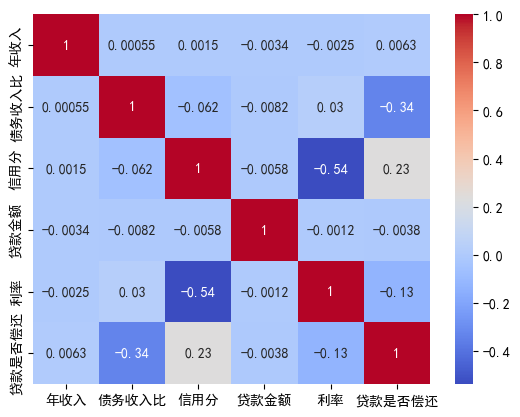

In [32]:
import seaborn as sns
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=['SimHei']
rela=data.select_dtypes(['number']).corr()
sns.heatmap(rela,annot=True,cmap='coolwarm')

#### 能看出信用分越高，贷款利率越低，货款越可能偿还,债务收入比越高，贷款越可能未偿还,利率越高，贷款越可能没偿还

债务收入比：每月的总债务还款额/每月总收入

In [13]:
a=back['年收入'].mean()
b=unback['年收入'].mean()
a,b

(np.float64(48296.999711115415), np.float64(47875.50388094561))

对偿还贷款与未偿还贷款的年收入进行比较，发现收入相差不大，年收入对贷款是否偿还影响不大

C:\Users\86150\AppData\Local\Temp\ipykernel_9596\3571590089.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


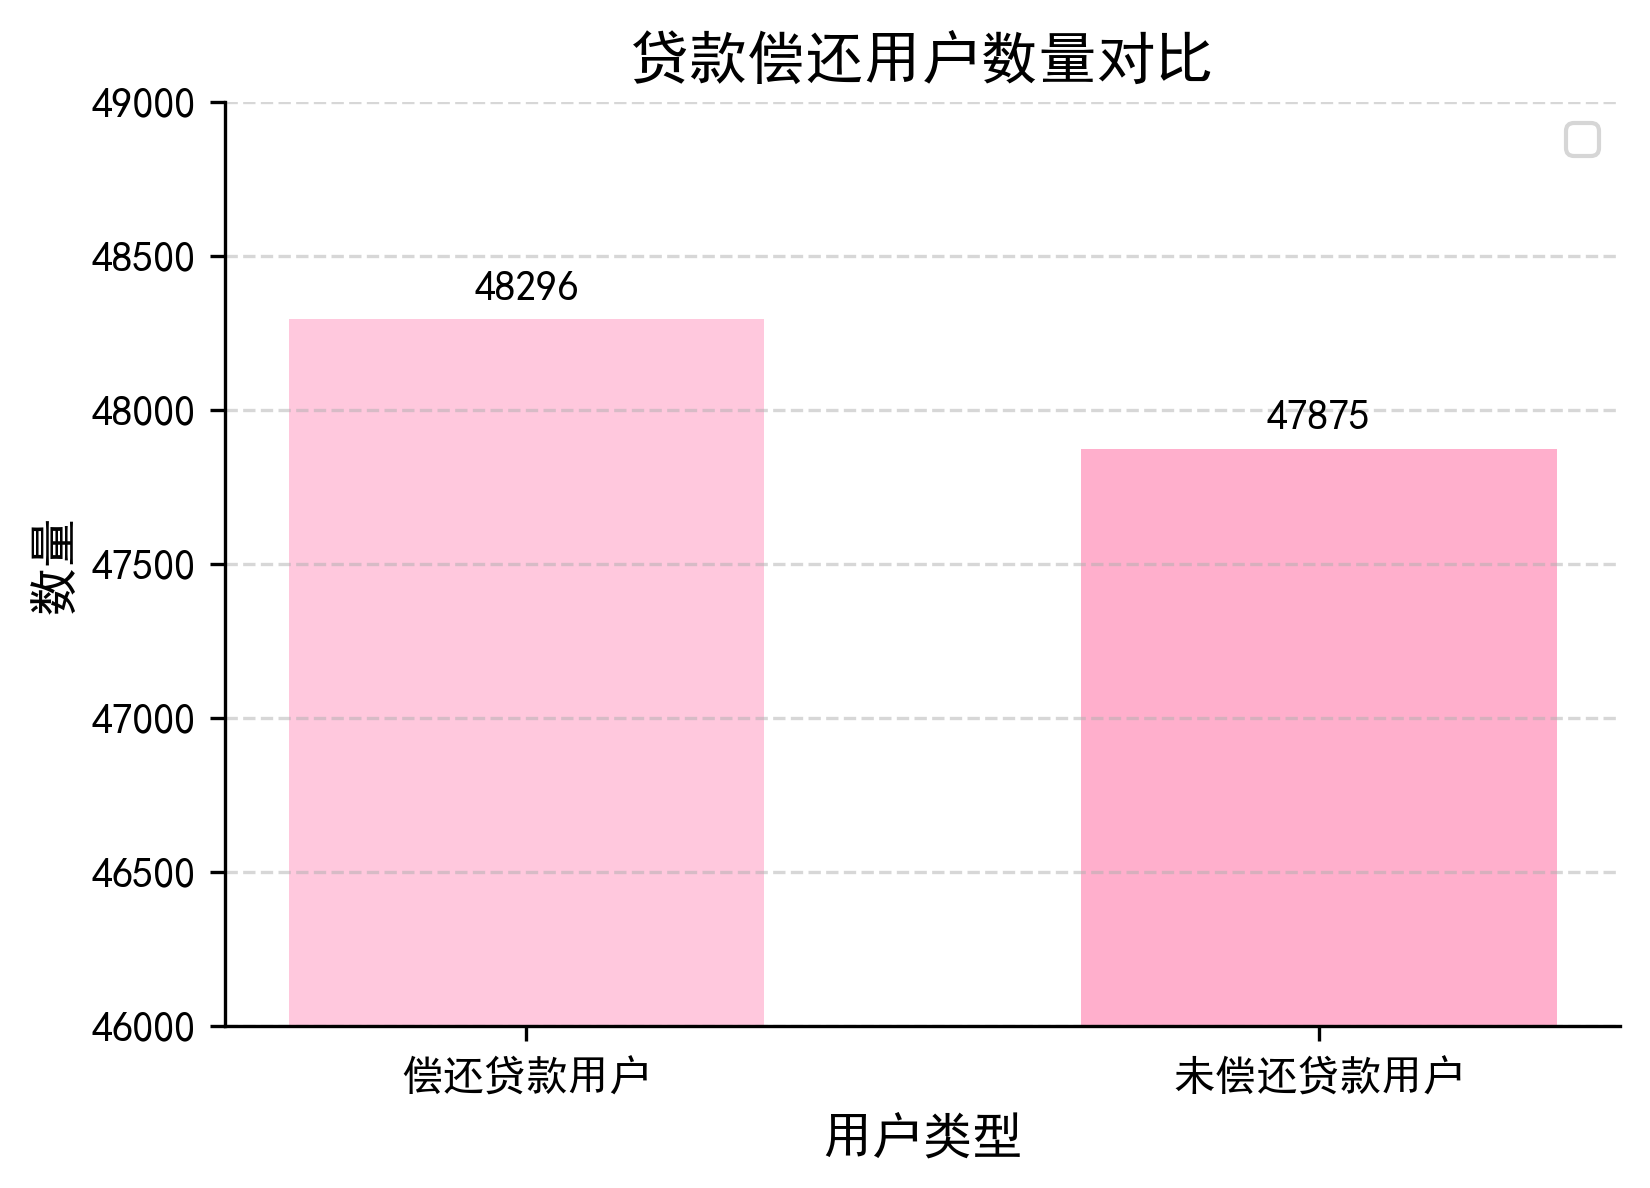

In [33]:
plt.figure(figsize=(6,4),dpi=300)
labels=['偿还贷款用户','未偿还贷款用户']
heights=[a,b]
plt.ylim(46000,49000)
plt.title('贷款偿还用户数量对比', fontsize=14, fontweight='bold')
plt.xlabel('用户类型', fontsize=12)
plt.ylabel('数量', fontsize=12)
plt.bar(labels,heights,width=0.6,color=['#ffc8dd', '#ffafcc'])
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for x,y in enumerate(heights):
    plt.text(x,y+100,f'{int(y)}',ha='center',va='center',fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.show()

In [15]:
a1=round((back['婚姻状态'].value_counts()*100)/len(back),2)
b1=round((unback['婚姻状态'].value_counts()*100)/len(unback),2)

In [16]:
a1=a1.sort_values()
b1=b1.sort_values()

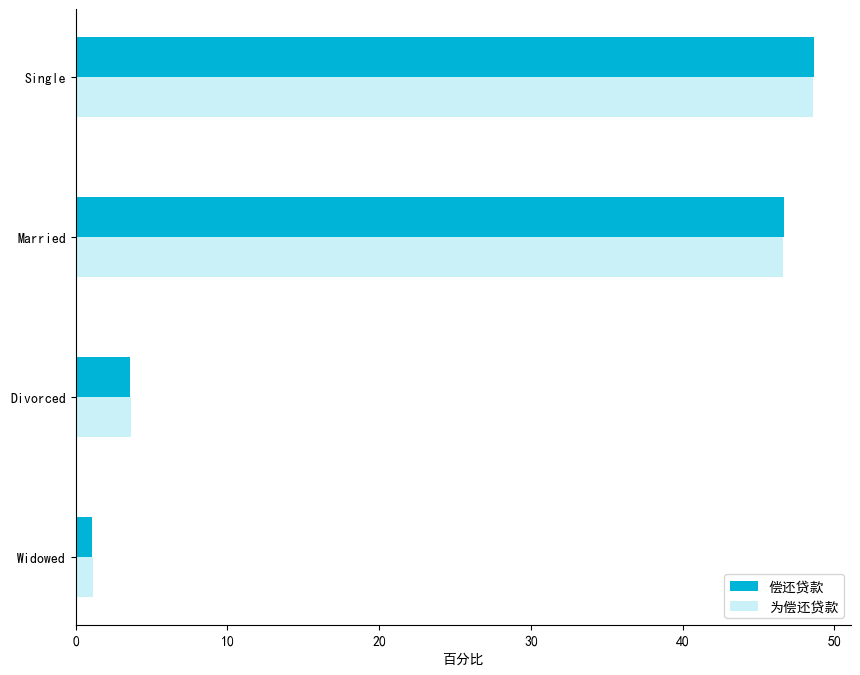

In [17]:
fig,ax=plt.subplots(figsize=(10,8))
height=0.25
ax.barh(y=range(4),width=a1.values,height=height,color='#00b4d8',label='偿还贷款')
ax.barh(y=[i-height for i in range(4)],width=b1.values,height=height,color='#caf0f8',label='为偿还贷款')
# ax.set_xticks(a1.values)
# ax.set_xticklabels()
ax.set_yticks([i-height/2 for i in range(4)])
ax.set_yticklabels(a1.index)
plt.xlabel('百分比')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.show()

婚姻状态与贷款偿还状态相差不大

In [18]:
data.head()

,年收入,债务收入比,信用分,贷款金额,利率,性别,婚姻状态,教育程度,就业状态,贷款目的,等级,贷款是否偿还
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


<Axes: xlabel='信用分', ylabel='利率'>

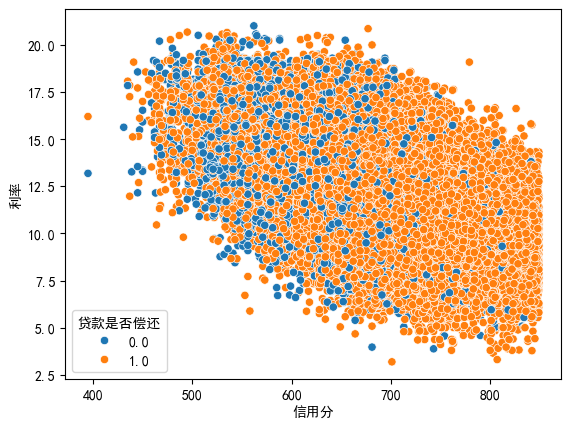

In [19]:
sns.scatterplot(x='信用分',y='利率',data=data,hue='贷款是否偿还')


信用分数越高，利率越低，偿还概率越高

In [20]:
a2=back['债务收入比'].mean()
b2=unback['债务收入比'].mean()

In [21]:
a2,b2

(np.float64(0.10914412449893993), np.float64(0.16656403841004183))

未偿还客户的债务收入比要高于偿还用户

In [22]:
back['教育程度'].value_counts()

教育程度
Bachelor's     220579
High School    148654
Master's        74696
Other           21416
PhD              9149
Name: count, dtype: int64

In [23]:
a3=round((back['教育程度'].value_counts()*100)/len(back),2)
b3=round((unback['教育程度'].value_counts()*100)/len(unback),2)

In [24]:
a3,b3

(教育程度
 Bachelor's     46.49
 High School    31.33
 Master's       15.74
 Other           4.51
 PhD             1.93
 Name: count, dtype: float64,
 教育程度
 Bachelor's     49.39
 High School    29.24
 Master's       15.40
 Other           4.40
 PhD             1.57
 Name: count, dtype: float64)

教育程度对贷款的偿还关系不大

In [36]:
data['性别'].value_counts()

性别
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

性别对贷款的偿还关系也不大

In [25]:
a4=round((back['就业状态'].value_counts()*100)/len(back),2)
b4=round((unback['就业状态'].value_counts()*100)/len(unback),2)

In [26]:
a4,b4

(就业状态
 Employed         84.92
 Self-employed     9.94
 Retired           3.46
 Unemployed        1.02
 Student           0.66
 Name: count, dtype: float64,
 就业状态
 Unemployed       48.23
 Employed         39.92
 Student           7.35
 Self-employed     4.46
 Retired           0.04
 Name: count, dtype: float64)

In [27]:
df_a4=a4.to_frame(name='偿还就业占比')
df_b4=b4.to_frame(name='未偿还就业占比')

In [28]:
c=pd.concat([df_a4,df_b4],axis=1)

In [29]:
c

,偿还就业占比,未偿还就业占比
就业状态,,
Employed,84.92,39.92
Self-employed,9.94,4.46
Retired,3.46,0.04
Unemployed,1.02,48.23
Student,0.66,7.35


In [30]:
c.index

Index(['Employed', 'Self-employed', 'Retired', 'Unemployed', 'Student'], dtype='object', name='就业状态')

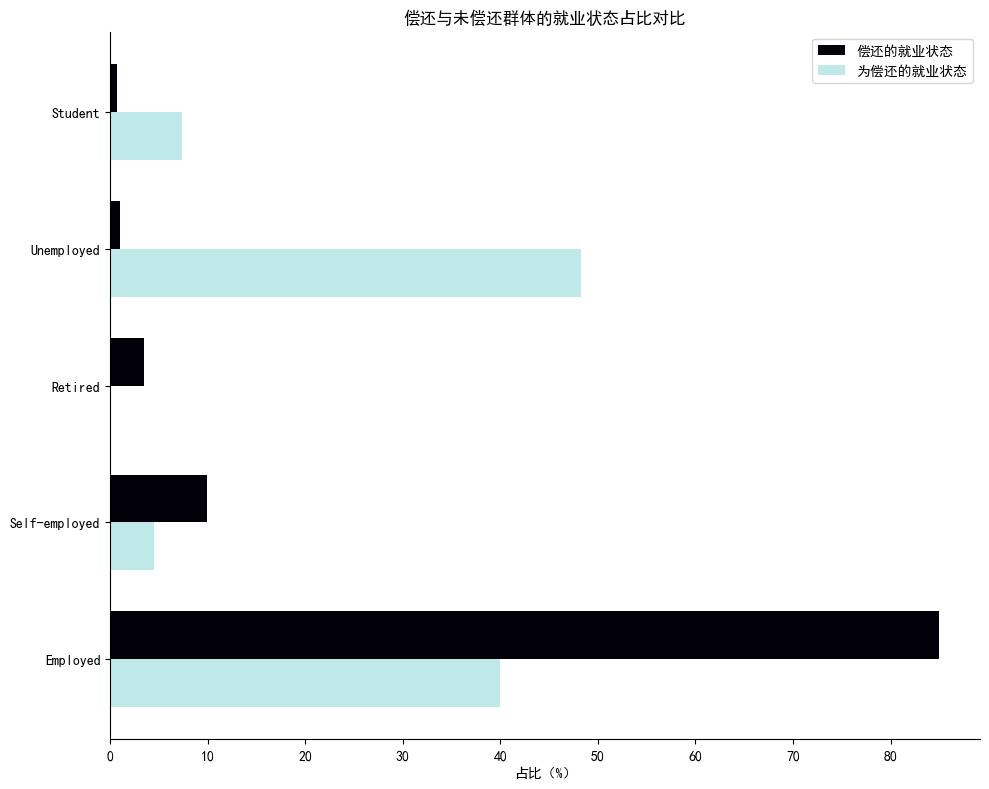

In [35]:
fig,ax=plt.subplots(figsize=(10,8))
height=0.35
ax.barh(y=[i+height/2 for i in range(5)],width=c.iloc[:,0],height=height,color='#02010a',label='偿还的就业状态')
ax.barh(y=[i-height/2 for i in range(5)],width=c.iloc[:,1],height=height,color='#bee9e8',label='为偿还的就业状态')
ax.set_yticks(range(5))
ax.set_yticklabels(c.index)
ax.set_xlabel("占比（%）")
ax.set_title("偿还与未偿还群体的就业状态占比对比")
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

两者就业状态差距非常大，就业对贷款的偿还起了非常重要的作用

## 结论

可以审查贷款人员的工作状态和员工的信用分，将这两项作为是否给予贷款的主要参考